In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [17]:
# 读取文件中的数据
stu_grade = pd.read_csv('student-mat.csv')
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams["axes.unicode_minus"] = False
stu_grade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [29]:
# 相关性                    
r = stu_grade['G1'].corr(stu_grade['G3']) # Pearson's r
print(r)
rho = stu_grade['G1'].corr(stu_grade['G3'], method='spearman')  # Spearman's rho
print(rho)
tau = stu_grade['G1'].corr(stu_grade['G3'], method='kendall')   # Kendall's tau
print(tau)

0.8014679320174148
0.8780012974585708
0.7463426255209579


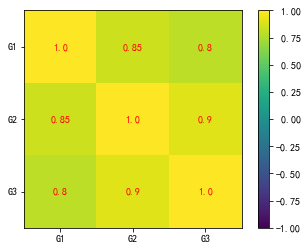

In [32]:
# 热力图
heart = np.array([stu_grade['G1'],stu_grade['G2'],stu_grade['G3']])
corr_matrix = np.corrcoef(heart).round(decimals=2)
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('G1', 'G2', 'G3'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('G1', 'G2', 'G3'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

# 现象：G1,G2,G3三者具有较强的相关性，其于起初的数据集描述对应，在后续于各属性的关系图中也有所体现。

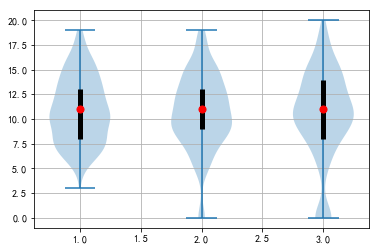

In [33]:
# G1,G2,F3数据分布
# 调用pyplot.grid()方法为画布添加网格
# 调用numpy.percentile()计算下四分为数，均值数，上四分为数
# 调用pyplot.scatter()在提琴图上标记均值的符号
# 调用pyplot.vline()在提琴图上标记四分位数
coll_1 = stu_grade['G1']
coll_2 = stu_grade['G2']
coll_3 = stu_grade['G3']
  
data_plotter = [coll_1, coll_2, coll_3]
  
plt.violinplot(data_plotter)
plt.grid()
 
q1,me,q3 = np.percentile(data_plotter,[25,50,75],axis=1)
ind = np.arange(1,len(me)+1)
 
plt.scatter(ind,me,marker="o",color="r",s=50,zorder=3) # 均值 
plt.vlines(ind,q1,q3,color="k",linestyles="-",lw=5) # 四分位数


plt.show()

# 现象：G1,G2,G3的均值均在10到12之间，且分数分布较为一致

([<matplotlib.patches.Wedge at 0x22bfc0b3e48>,
 [Text(1.09986,0.0174967,'0<G1<5'),
  Text(0.509109,0.975094,'5<G1<10'),
  Text(-1.09499,-0.104826,'10<G1<15'),
  Text(-0.0655766,-1.09804,'15<G1<20'),
  Text(0.87424,-0.667611,'G1>20')],
 [Text(0.599924,0.00954368,'0.51%'),
  Text(0.277696,0.531869,'33.67%'),
  Text(-0.597269,-0.0571776,'34.68%'),
  Text(-0.0357691,-0.598933,'10.38%'),
  Text(0.476858,-0.364152,'20.76%')])

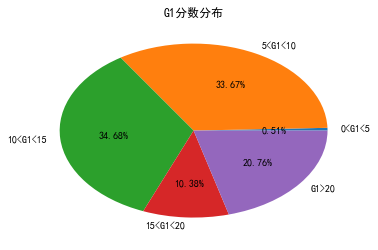

In [27]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in stu_grade['G1']:
    if i > 0 and i < 5:
        count1 = count1 + 1
    elif i > 5 and i < 10:
        count2 = count2 + 1
    elif i > 10 and i < 15:
        count3 = count3 + 1
    elif i > 15 and i < 20:
        count4 = count4 + 1
    else:
        count5 = count5 + 1
countt = [count1,count2,count3,count4,count5]
sum_countt = sum(countt)
for j in range(len(countt)):
    countt[j] = (countt[j] / sum_countt)*100
plt.title('G1分数分布')
plt.pie(countt,autopct='%.2f%%',labels=['0<G1<5','5<G1<10','10<G1<15','15<G1<20','G1>20'])

([<matplotlib.patches.Wedge at 0x22bfc0ec7f0>,
 [Text(1.09997,0.00874865,'0<G2<5'),
  Text(0.64302,0.892483,'5<G2<10'),
  Text(-1.08165,0.200101,'10<G2<15'),
  Text(-0.438067,-1.00901,'15<G2<20'),
  Text(0.718542,-0.832885,'G2>20')],
 [Text(0.599981,0.00477199,'0.25%'),
  Text(0.350738,0.486809,'29.62%'),
  Text(-0.589989,0.109146,'34.43%'),
  Text(-0.238946,-0.550368,'8.35%'),
  Text(0.391932,-0.454301,'27.34%')])

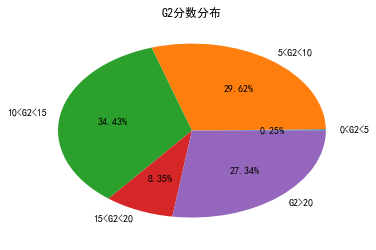

In [29]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in stu_grade['G2']:
    if i > 0 and i < 5:
        count1 = count1 + 1
    elif i > 5 and i < 10:
        count2 = count2 + 1
    elif i > 10 and i < 15:
        count3 = count3 + 1
    elif i > 15 and i < 20:
        count4 = count4 + 1
    else:
        count5 = count5 + 1
countt = [count1,count2,count3,count4,count5]
sum_countt = sum(countt)
for j in range(len(countt)):
    countt[j] = (countt[j] / sum_countt)*100
plt.title('G2分数分布')
plt.pie(countt,autopct='%.2f%%',labels=['0<G2<5','5<G2<10','10<G2<15','15<G2<20','G2>20'])

([<matplotlib.patches.Wedge at 0x22bfae337b8>,
 [Text(1.09997,0.00874865,'0<G3<5'),
  Text(0.852562,0.695082,'5<G3<10'),
  Text(-0.835736,0.715224,'10<G3<15'),
  Text(-0.852562,-0.695081,'15<G3<20'),
  Text(0.524554,-0.966873,'G3>20')],
 [Text(0.599981,0.00477199,'0.25%'),
  Text(0.465034,0.379135,'21.27%'),
  Text(-0.455856,0.390122,'34.43%'),
  Text(-0.465034,-0.379135,'9.87%'),
  Text(0.28612,-0.527385,'34.18%')])

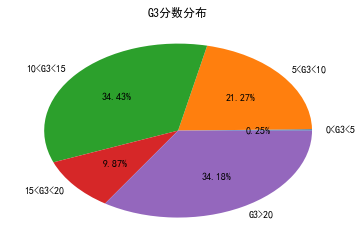

In [28]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in stu_grade['G3']:
    if i > 0 and i < 5:
        count1 = count1 + 1
    elif i > 5 and i < 10:
        count2 = count2 + 1
    elif i > 10 and i < 15:
        count3 = count3 + 1
    elif i > 15 and i < 20:
        count4 = count4 + 1
    else:
        count5 = count5 + 1
countt = [count1,count2,count3,count4,count5]
sum_countt = sum(countt)
for j in range(len(countt)):
    countt[j] = (countt[j] / sum_countt)*100
plt.title('G3分数分布')
plt.pie(countt,autopct='%.2f%%',labels=['0<G3<5','5<G3<10','10<G3<15','15<G3<20','G3>20'])

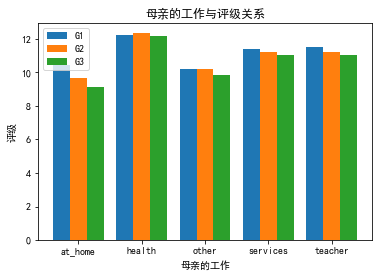

In [4]:
Mjob_stu_grade = stu_grade[['Mjob','G1','G2','G3']]
Mjob = np.unique(stu_grade['Mjob'])
# Mjob_stu_grade.head()
Mjob_stu_grade = Mjob_stu_grade.groupby('Mjob').mean()
# display(Mjob_stu_grade) # 按照母亲的工作次数分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(Mjob) # 总共分组

plt.bar([x for x in range(seriesNums)], height=Mjob_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=Mjob_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=Mjob_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], Mjob)
plt.xlabel("母亲的工作")
plt.ylabel("评级")
plt.title("母亲的工作与评级关系")
plt.legend()
plt.show()

# 现象：评级较高的学生中母亲从事保健相关工作程度更大，其次是公务员与教师，三者之值平均约在3.5之间，其于决策树预测结果较为一致，决策树的预测为>3.5为非最差等级。

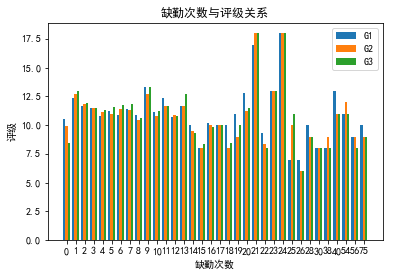

In [83]:
absences_stu_grade = stu_grade[['absences','G1','G2','G3']]
absences = np.unique(stu_grade['absences'])
# absences_stu_grade.head()
absences_stu_grade = absences_stu_grade.groupby('absences').mean()
# display(absences_stu_grade) # 按照学校缺勤次数分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(absences) # 总共分组

plt.bar([x for x in range(seriesNums)], height=absences_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=absences_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=absences_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], absences)
plt.xlabel("缺勤次数")
plt.ylabel("评级")
plt.title("缺勤次数与评级关系")
plt.legend()
plt.show()
# 现象：评级较高的学生中缺勤次数集中在20到24之间，这与决策树中一层的划分有一定的出入，决策树一层中等级较高学生缺勤次数较少，其考虑原因可能与决策树构建中其他属性对结果的影响有所出入。

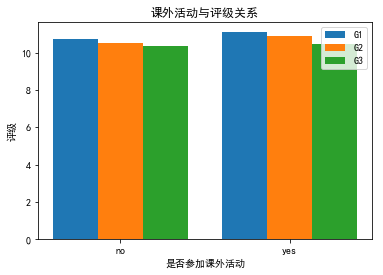

In [39]:
activities_stu_grade = stu_grade[['activities','G1','G2','G3']]
activities = np.unique(stu_grade['activities'])
# activities_stu_grade.head()
activities_stu_grade = activities_stu_grade.groupby('activities').mean()
# display(activities_stu_grade) # 按照课外活动分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(activities) # 总共分组

plt.bar([x for x in range(seriesNums)], height=activities_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=activities_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=activities_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], activities)
plt.xlabel("是否参加课外活动")
plt.ylabel("评级")
plt.title("课外活动与评级关系")
plt.legend()
plt.show()
# 现象：是否参加课外活动貌似并没有特别影响评分，只是未参加课外活动的同学在评分上略微与参加课外活动同学有所距离。这与决策树结果基本一致。

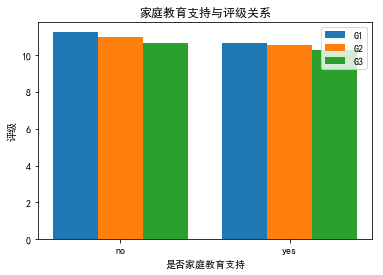

In [40]:
famsup_stu_grade = stu_grade[['famsup','G1','G2','G3']]
famsup = np.unique(stu_grade['famsup'])
# famsup_stu_grade.head()
famsup_stu_grade = famsup_stu_grade.groupby('famsup').mean()
# display(famsup_stu_grade) # 按照家庭教育支持分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(famsup) # 总共分组

plt.bar([x for x in range(seriesNums)], height=famsup_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=famsup_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=famsup_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], famsup)
plt.xlabel("是否家庭教育支持")
plt.ylabel("评级")
plt.title("家庭教育支持与评级关系")
plt.legend()
plt.show()
# 现象：是否有家庭教育支持貌似也并没有特别影响评分，只是有家庭教育支持的同学在评分上略微与未家庭教育支持同学有所距离。这与决策树结果相悖。

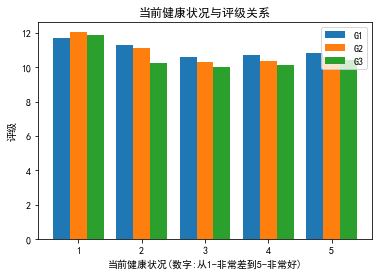

In [41]:
health_stu_grade = stu_grade[['health','G1','G2','G3']]
health = np.unique(stu_grade['health'])
# health_stu_grade.head()
health_stu_grade = health_stu_grade.groupby('health').mean()
# display(health_stu_grade) # 按照当前健康状况次数分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(health) # 总共分组

plt.bar([x for x in range(seriesNums)], height=health_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=health_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=health_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], health)
plt.xlabel("当前健康状况(数字:从1-非常差到5-非常好)")
plt.ylabel("评级")
plt.title("当前健康状况与评级关系")
plt.legend()
plt.show()
# 现象：健康状况对最终评分的影响由图看到的是两极化的，其中状况非常差和状况非常好学生评分都相对更好更高一些，这与决策树划分结果相同，其中造成不不完全一致的原因可也在于此处G1,G2,G3的反映是用均值进行反映的，但是这并不能完全反映每一个个体的状态与评分的关系。

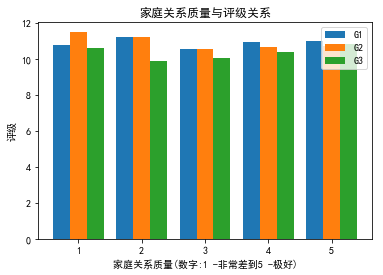

In [32]:
famrel_stu_grade = stu_grade[['famrel','G1','G2','G3']]
famrel = np.unique(stu_grade['famrel'])
# famrel_stu_grade.head()
famrel_stu_grade = famrel_stu_grade.groupby('famrel').mean()
# display(famrel_stu_grade) # 按照家庭关系质量分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(famrel) # 总共分组

plt.bar([x for x in range(seriesNums)], height=famrel_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=famrel_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=famrel_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], famrel)
plt.xlabel("家庭关系质量(数字:1 -非常差到5 -极好)")
plt.ylabel("评级")
plt.title("家庭关系质量与评级关系")
plt.legend()
plt.show()
# 现象：G1,G2,G3分别与家庭关系质量的关系图中各异，无法直接从柱状图中得到较为可靠结论。

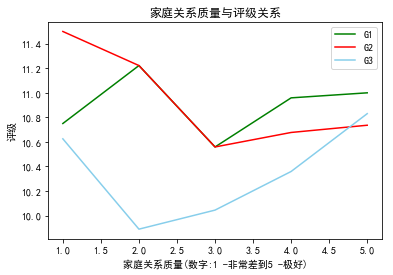

In [34]:
plt.plot(famrel, famrel_stu_grade['G1'], color='green', label='G1')
plt.plot(famrel, famrel_stu_grade['G2'], color='red', label='G2')
plt.plot(famrel, famrel_stu_grade['G3'],  color='skyblue', label='G3')
plt.legend() # 显示图例
plt.title('家庭关系质量与评级关系')
plt.xlabel("家庭关系质量(数字:1 -非常差到5 -极好)")
plt.ylabel("评级")
plt.show()
# 现象：由折线图可看出G1，G2,G3的结果各异，G2的结果与评级具有一定的负影响。G1则主要受中间值的影响较大，G3则家庭关系质量中交叉对G3评分影响较大。

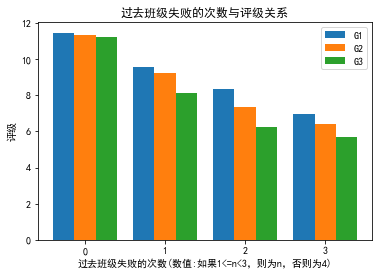

In [7]:
failures_stu_grade = stu_grade[['failures','G1','G2','G3']]
failures = np.unique(stu_grade['failures'])
# failures_stu_grade.head()
failures_stu_grade = failures_stu_grade.groupby('failures').mean()
# display(failures_stu_grade) # 按照过去班级失败的次数分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(failures) # 总共分组

plt.bar([x for x in range(seriesNums)], height=failures_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=failures_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=failures_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], failures)
plt.xlabel("过去班级失败的次数(数值:如果1<=n<3，则为n，否则为4)")
plt.ylabel("评级")
plt.title("过去班级失败的次数与评级关系")
plt.legend()
plt.show()
# 过去班级失败的次数与评分结果有比较大的关联，其中失败次数越少，评分更高，其于决策树划分结果较为一致，这也说明了学习中正反馈的重要性。

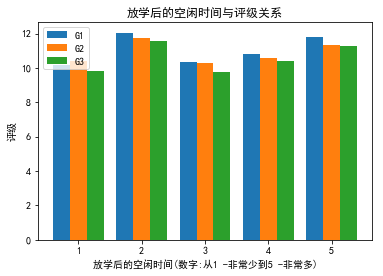

In [8]:
freetime_stu_grade = stu_grade[['freetime','G1','G2','G3']]
freetime = np.unique(stu_grade['freetime'])
# freetime_stu_grade.head()
freetime_stu_grade = freetime_stu_grade.groupby('freetime').mean()
# display(freetime_stu_grade) # 按照放学后的空闲时间分组

totalWidth=0.8 # 一组柱状体的宽度
labelNums=3 # 一组有两种类别
barWidth=totalWidth/labelNums # 单个柱体的宽度
seriesNums=len(freetime) # 总共分组

plt.bar([x for x in range(seriesNums)], height=freetime_stu_grade['G1'], label="G1", width=barWidth)
plt.bar([x+barWidth for x in range(seriesNums)], height=freetime_stu_grade['G2'], label="G2", width=barWidth)
plt.bar([x+2*barWidth for x in range(seriesNums)], height=freetime_stu_grade['G3'], label="G3", width=barWidth)

plt.xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], freetime)
plt.xlabel("放学后的空闲时间(数字:从1 -非常少到5 -非常多)")
plt.ylabel("评级")
plt.title("放学后的空闲时间与评级关系")
plt.legend()
plt.show()
# 现象：放学后的空闲时间比较少的同学评分更高，但是其次放学后的空闲时间则是较多和非常多。这与决策树结果基本一致。同时也说明了劳逸结合的重要性。